In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                    ])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle= True)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x= F.log_softmax(self.fc4(x),dim=1)
        
        return x
    
    


In [4]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [5]:
epochs= 10
train_losses=[]
test_losses=[]
model.train()
for e in range(epochs):
    train_loss = 0
    train_accuracy=0
    for images,labels in trainloader:
        outputs = model(images)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        preds = torch.exp(outputs)
        top_class= torch.argmax(preds,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        
        
    
    else :
        test_loss=0
        test_accuracy=0
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                    predictions = model(images)
                    loss = criterion(predictions,labels)
                    test_loss += loss.item()
                    predictions = torch.exp(predictions)
                    top_class = torch.argmax(predictions,dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    test_accuracy += torch.mean(equals.type(torch.FloatTensor))
                    
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Train Accuracy: {:.3f}".format(train_accuracy/len(trainloader)),
              "Test Accuracy: {:.3f}".format(test_accuracy/len(testloader)))
        
        model.train()

Epoch: 1/10..  Training Loss: 0.614..  Test Loss: 0.470..  Train Accuracy: 0.782 Test Accuracy: 0.827
Epoch: 2/10..  Training Loss: 0.486..  Test Loss: 0.438..  Train Accuracy: 0.830 Test Accuracy: 0.843
Epoch: 3/10..  Training Loss: 0.451..  Test Loss: 0.425..  Train Accuracy: 0.841 Test Accuracy: 0.849
Epoch: 4/10..  Training Loss: 0.431..  Test Loss: 0.429..  Train Accuracy: 0.848 Test Accuracy: 0.849
Epoch: 5/10..  Training Loss: 0.422..  Test Loss: 0.402..  Train Accuracy: 0.853 Test Accuracy: 0.859
Epoch: 6/10..  Training Loss: 0.419..  Test Loss: 0.400..  Train Accuracy: 0.852 Test Accuracy: 0.859
Epoch: 7/10..  Training Loss: 0.405..  Test Loss: 0.393..  Train Accuracy: 0.858 Test Accuracy: 0.859
Epoch: 8/10..  Training Loss: 0.396..  Test Loss: 0.407..  Train Accuracy: 0.863 Test Accuracy: 0.859
Epoch: 9/10..  Training Loss: 0.393..  Test Loss: 0.385..  Train Accuracy: 0.863 Test Accuracy: 0.864
Epoch: 10/10..  Training Loss: 0.391..  Test Loss: 0.427..  Train Accuracy: 0.863 

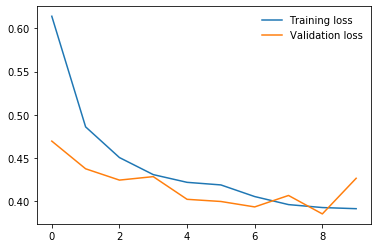

In [6]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)